# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [4]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [5]:
#Read in data from source 
df_raw = pd.read_csv("../my_hw_repo/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [6]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

In [7]:
df_raw_howmany = 400 + 398 + 398 + 399
df_raw_howmany

1595

Answer: 1595

#### Question 2. Create a summary table

In [8]:
df_raw.describe(percentiles=np.arange(.1, 1.0, 0.1))

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
10%,0.000000,440.000000,2.90000,1.000000
20%,0.000000,500.000000,3.05000,2.000000
30.0%,0.000000,520.000000,3.17000,2.000000
40%,0.000000,560.000000,3.31000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
60%,0.000000,620.000000,3.50000,3.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: GRE scores have a broader range of numbers and therefore have more room for variance whereas GPA is on a much smaller scale and contains less variance. Overall, it's also likelier that per individual, the GRE score itself varies from someone who does well on math and doesn't do well on others whereas national and international averages of GPA often show small variances for the population at large.

#### Question 4. Drop data points with missing data


In [9]:
df_dropped = df_raw.dropna()

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

In [10]:
df_dropped.count()

admit       397
gre         397
gpa         397
prestige    397
dtype: int64

Answer: Some were dropped from each group.


#### Question 6. Create box plots for GRE and GPA

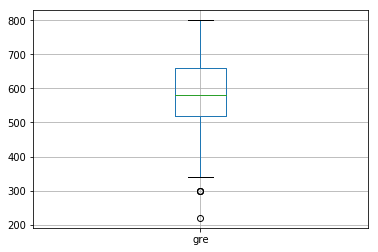

In [11]:
df_dropped.boxplot('gre');

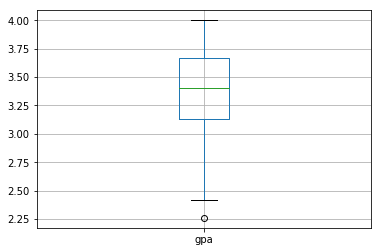

In [12]:
df_dropped.boxplot('gpa');

#### Question 7. What do this plots show?

Answer: The center green line is hte median of the data while the box that it is in represents the middle 50% of the data and the average. The whiskers the extend below and above represent the outliers of the data in the interquartiles.

#### Question 8. Describe each distribution 

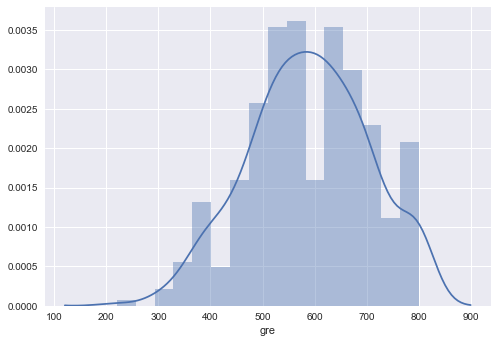

In [13]:
# plot the distribution of each variable 

import seaborn as sns
sns.distplot(df_dropped['gre']);

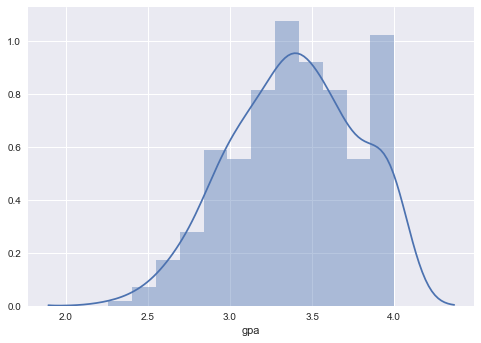

In [14]:
import seaborn as sns
sns.distplot(df_dropped['gpa']);

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: Yes; or, at least nearly normal. The distribution is a little skewed to the left for each of the variables.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: No, because the data is nearly normally distributed. My only concern is the nearly absent middle scores in the distribution of the GRE scores so the edges are drawing the tails up and makign them a little too wide for normal distribution standards.

#### Question 11. Which of our variables are potentially colinear? 

In [15]:
# create a correlation matrix for the data

df_dropped.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Answer:  There is very little correlation between the variables in this data set.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: First, create a variable with just the grad school admissions rates and the prestige of undergraduate schools. Then retrieve descriptive statistics for each of the two variables. Then plot the two distributions separately and on top of each other to see how they are clustered. The next step would then be plotting a best fit line via linear regression to model the data and establish that they are not correlated, assuming that the resulting best fit line did not fit the data of each variable plotted against each other.

#### Question 14. What is your hypothesis? 

Answer: Are graduate school admissions rates influenced by the prestige of an undergraduate school that an individual has attended?

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data